In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np
from keras.models import Sequential, Model
#from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

from keras.layers.merge import concatenate
from sklearn import metrics
import os

from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_generator = ImageDataGenerator(rescale=1./255.,
                               shear_range=0.15,
                               zoom_range=0.15,
                               featurewise_center=False,
                               samplewise_center=False,
                               featurewise_std_normalization=False,
                               samplewise_std_normalization=False,
                               zca_whitening=False,
                               zca_epsilon=1e-06,
                               rotation_range=0,
                               width_shift_range=0.0,
                               height_shift_range=0.0,
                               brightness_range=None,
                               channel_shift_range=0.0,                             
                               cval=0.0,
                               horizontal_flip=False,
                               preprocessing_function=None,
                               data_format=None,
                               validation_split=0.0)
batch_size = 32

Training_datas= data_generator.flow_from_directory(
    '/content/gdrive/My Drive/brain_tumor_dataset(150)1/Training',
    target_size = (150, 150),
    batch_size = batch_size,
    shuffle = True,
    class_mode ='binary'
)

#image_gen1 = ImageDataGenerator(rescale=1./255.)

Validation_datas = data_generator.flow_from_directory(
    '/content/gdrive/My Drive/brain_tumor_dataset(150)1/Val',
    target_size = (150, 150),
    batch_size = batch_size,
    shuffle = True,
    class_mode = 'binary'
)
Test_Datas = data_generator.flow_from_directory(
    '/content/gdrive/My Drive/brain_tumor_dataset(150)1/Testing',
    target_size = (150, 150),
    batch_size = 1,
    shuffle = False,
    class_mode ='binary'
)

Found 2953 images belonging to 2 classes.
Found 226 images belonging to 2 classes.
Found 227 images belonging to 2 classes.


In [17]:

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

act_sig='sigmoid'
act_relu = 'relu'
x = 0.001
Input = (150,150,3)
init='he_normal'
Dropoutt = 0.15
padding = 'same'

model = Sequential()
model.add(BatchNormalization(input_shape = Input))
model.add(Conv2D(filters=16, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))

model.add(Conv2D(filters=32, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))
model.add(Dropout(Dropoutt))

model.add(Conv2D(filters=64, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))
model.add(Dropout(Dropoutt))

model.add(Conv2D(filters =128, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))
model.add(Dropout(Dropoutt))

model.add(Conv2D(filters=256, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))
model.add(Dropout(Dropoutt))

model.add(Conv2D(filters=512, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))
model.add(Dropout(Dropoutt))
"""
model.add(Conv2D(filters=1024, kernel_size=3, activation=act_relu, padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=x))
model.add(Dropout(0.3))
"""
#model.add(GlobalAveragePooling2D())
model.add(Flatten())

model.add(Dense(512, kernel_initializer=init, activation=act_relu))
model.add(Dropout(Dropoutt))


model.add(Dense(256, kernel_initializer=init, activation=act_relu))
model.add(Dropout(Dropoutt))


model.add(Dense(128, kernel_initializer=init, activation=act_relu))
model.add(Dropout(Dropoutt))


model.add(Dense(64, kernel_initializer=init, activation=act_relu))
model.add(Dropout(Dropoutt))


model.add(Dense(32, kernel_initializer=init, activation=act_relu))
model.add(Dropout(Dropoutt))

model.add(Dense(1, activation=act_sig))

model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 150, 150, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 75, 75, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                      

In [20]:
# Parameters Initialization
from tensorflow.keras.optimizers import Adam, RMSprop

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Training_Steps = 2953//batch_size
Validation_Steps = 226//batch_size
history = model.fit(
    Training_datas,
    epochs=30,
    steps_per_epoch=Training_Steps,
    validation_data=Validation_datas,
    validation_steps=Validation_Steps
)

#odel.save("custom_augmented_model.h5")

Epoch 1/30
92/92 [==============================] - 22s 223ms/step - loss: 0.2165 - accuracy: 0.9079 - val_loss: 0.5483 - val_accuracy: 0.7054
Epoch 2/30
92/92 [==============================] - 20s 221ms/step - loss: 0.1898 - accuracy: 0.9154 - val_loss: 0.4743 - val_accuracy: 0.7857
Epoch 3/30
92/92 [==============================] - 22s 239ms/step - loss: 0.1737 - accuracy: 0.9332 - val_loss: 0.4149 - val_accuracy: 0.8438
Epoch 4/30
92/92 [==============================] - 21s 233ms/step - loss: 0.1505 - accuracy: 0.9370 - val_loss: 0.3478 - val_accuracy: 0.8571
Epoch 5/30
92/92 [==============================] - 20s 221ms/step - loss: 0.1481 - accuracy: 0.9418 - val_loss: 0.3210 - val_accuracy: 0.8750
Epoch 6/30
92/92 [==============================] - 20s 220ms/step - loss: 0.1406 - accuracy: 0.9377 - val_loss: 0.2740 - val_accuracy: 0.8839
Epoch 7/30
92/92 [==============================] - 20s 221ms/step - loss: 0.1272 - accuracy: 0.9452 - val_loss: 0.2519 - val_accuracy: 0.8929

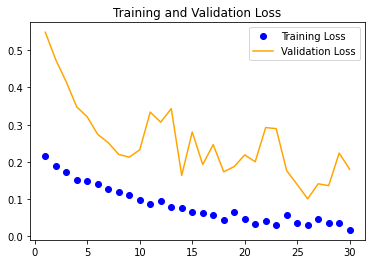

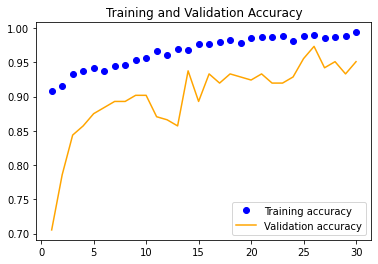

In [21]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [31]:
def create_test_data(dir,n):
    test_datas = []
    for img in tqdm(os.listdir(dir)):
        label = n
        path = os.path.join(dir,img)
        img = cv2.imread(path)
        #test_datas.append([np.array(img),np.array(label)])
        test_datas.append(np.asarray(img).astype('float32'))
        
    np.save('test_datas.npy', test_datas)
    return test_datas


test_data_n = create_test_data('/content/gdrive/My Drive/brain_tumor_dataset(150)1/Testing/no',0.0)
test_data_y = create_test_data('/content/gdrive/My Drive/brain_tumor_dataset(150)1/Testing/yes',1.0)

#x = np.hsplit(test_data_y)
#y = np.hsplit(test_data_n)
#new_test_datas = test_data_y + test_data_n
new_test_datas = np.concatenate((test_data_n, test_data_y), axis=0)
new_test_datas = tf.convert_to_tensor(new_test_datas)
#new_test_datas_l=concatenate(x[1],y[1])
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

y_pred = model.predict(new_test_datas)
print(y_pred)
y_test = Test_Datas.classes
y_pred=np.round_(y_pred)

accuracy1=sum(y_pred.flatten()==Test_Datas.classes)/len(Test_Datas.classes)
print("accuracy without MC droupout " + str(accuracy1))
#print(y_pred.flatten())
#print(Test_Datas.classes)

y_samples = np.stack([model(new_test_datas,training=True) for sample in range(30)])
y_samples_mean = y_samples.mean(axis=0)
y_samples_std = y_samples.std(axis=0)

#print(f'Mean = {np.round(y_samples_mean[:1],2)}')
#print(f'Std  = {np.round(y_samples_std[:1],2)}')

y_pred=np.round_(y_samples_mean)
#print(y_pred.flatten())
accuracy=sum(y_pred.flatten()==Test_Datas.classes)/len(Test_Datas.classes)
print("accuray with  MC droupout is " + str(accuracy))

"""
"""
"""
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))
"""



100%|██████████| 117/117 [00:00<00:00, 507.04it/s]


[[1.14098333e-01]
 [4.28244639e-05]
 [4.52964799e-04]
 [1.46447883e-06]
 [3.36950808e-03]
 [2.10945774e-02]
 [3.83711956e-03]
 [2.93379435e-06]
 [7.51765771e-03]
 [2.65812012e-03]
 [4.55644028e-03]
 [4.70369878e-06]
 [9.99512315e-01]
 [5.27298194e-04]
 [1.41432555e-03]
 [1.08109532e-04]
 [4.09593660e-04]
 [9.96751189e-01]
 [7.28309969e-05]
 [3.75593052e-04]
 [4.93161970e-05]
 [2.21738781e-04]
 [7.97359645e-03]
 [1.78106508e-04]
 [9.26927477e-03]
 [5.28584042e-06]
 [1.97595159e-06]
 [1.13049243e-03]
 [4.78374131e-05]
 [2.42889801e-05]
 [1.35323582e-02]
 [4.54716533e-02]
 [9.54618026e-03]
 [3.91199465e-05]
 [1.01601481e-02]
 [4.67238622e-03]
 [3.54184749e-06]
 [1.54985264e-02]
 [3.30618247e-02]
 [7.49124156e-05]
 [3.19644838e-04]
 [8.91476590e-03]
 [9.55936778e-03]
 [5.37610799e-03]
 [2.50526607e-01]
 [1.09212946e-04]
 [7.16076493e-02]
 [1.33950161e-02]
 [3.66810244e-03]
 [2.17285514e-01]
 [3.22594903e-02]
 [5.52890051e-05]
 [2.01414269e-03]
 [2.07336980e-05]
 [1.61803961e-02]
 [3.141402

'\nprint("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))\nprint("AP Score:", metrics.average_precision_score(y_test, y_pred))\nprint()\nprint(metrics.classification_report(y_test, y_pred > 0.5))\n'